In [1]:
# 必要なライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# 人口構成のCSVファイルの読み込み
df = pd.read_csv("population_data/japan_population.csv")
df.head()

,集計年,都道府県コード,都道府県名,総人口
0,1960,1,北海道,5039206.0
1,1960,2,青森県,1426606.0
2,1960,3,岩手県,1448517.0
3,1960,4,宮城県,1743195.0
4,1960,5,秋田県,1335580.0


In [3]:
# 全件数の確認
df.shape

(3055, 4)

In [4]:
tokyo = df[df["都道府県名"] == "東京都"]
tokyo.head(10)

,集計年,都道府県コード,都道府県名,総人口
12,1960,13,東京都,9683802.0
59,1961,13,東京都,9967000.0
106,1962,13,東京都,10224000.0
153,1963,13,東京都,10470000.0
200,1964,13,東京都,10668000.0
247,1965,13,東京都,10869244.0
294,1966,13,東京都,11018000.0
341,1967,13,東京都,11162000.0
388,1968,13,東京都,11286000.0
435,1969,13,東京都,11367000.0


In [5]:
# 1960年から2015年までの東京都の総人口数データを機械学習にかける。
# ある年の総人口数を説明変数X、その翌年の総人口数を目的変数yに設定する
# （Xは縦56行・横1列の二次元配列、yは長さ56の一次元配列としてndarrayを作成する）
X = np.empty((56, 1), dtype=np.uint32)
y = np.empty(56 , dtype=np.uint32)

# 人口はデータの左から3番目
for i in range(56):
    X[i][0] = tokyo.iloc[i, 3]
    y[i] = tokyo.iloc[i + 1, 3]

In [6]:
X[0:10]

array([[ 9683802],
       [ 9967000],
       [10224000],
       [10470000],
       [10668000],
       [10869244],
       [11018000],
       [11162000],
       [11286000],
       [11367000]], dtype=uint32)

In [7]:
y[0:10]

array([ 9967000, 10224000, 10470000, 10668000, 10869244, 11018000,
       11162000, 11286000, 11367000, 11408071], dtype=uint32)

In [8]:
# 1960年から2009年までを訓練データ、
# 2010年以降をテストデータとして分割する
X_train = X[:50]
X_test = X[50:]
y_train = y[:50]
y_test = y[50:]

In [9]:
# 線形回帰モデルの作成と学習の実行
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# テストデータで「翌年の総人口」予測の実施
y_pred = model.predict(X_test)

In [18]:
# 予測結果は実数値のため、整数値に変換
y_pred = y_pred.astype(np.uint32)
y_pred

array([13149404, 13185920, 13219966, 13289004, 13376011, 13485972],
      dtype=uint32)

In [19]:
# 正解の表示
y_test

array([13198000, 13234000, 13307000, 13399000, 13515271, 13624000],
      dtype=uint32)

In [20]:
# 正解値とグラフで比較するため
# 実測値と予測値とを連結させた配列y_pred_grを作成
y_pred_gr = np.concatenate([y_train, y_pred])

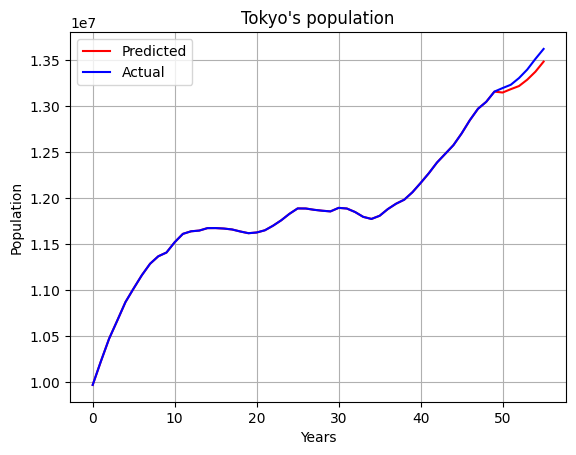

In [21]:
# 正解値と予測値のグラフ表示
plt.plot(range(56), y_pred_gr, label='Predicted', color='red')
plt.plot(range(56), y, label='Actual', color='blue')
plt.xlabel('Years')
plt.ylabel('Population')
plt.title("Tokyo's population")
plt.grid(True)
plt.legend(loc = "upper left")